#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
data=pd.read_csv("Final_Assignment_Data.csv")
data.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.6,5.6,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.7,6.7,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.6,5.6,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.3,6.3,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.9,5.9,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [3]:
data['Year'].unique() # This is the data from the Year 1970 to 1982

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [4]:
data=data.drop('GallonsPer100MilesTo1981',axis=1)
data=data.drop('Year70To81',axis=1)
data=data.drop('MPG',axis=1) #MPG=100/GallonsPer100Miles

In [5]:
data.head()

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.6,8,3.07,1.30,3.504,12.0,70,1,1,0,0,chevrolet chevelle malibu
1,6.7,8,3.50,1.65,3.693,11.5,70,1,1,0,0,buick skylark 320
2,5.6,8,3.18,1.50,3.436,11.0,70,1,1,0,0,plymouth satellite
3,6.3,8,3.04,1.50,3.433,12.0,70,1,1,0,0,amc rebel sst
4,5.9,8,3.02,1.40,3.449,10.5,70,1,1,0,0,ford torino


### EDA

In [6]:
data.info()
#There are no null values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GallonsPer100Miles  392 non-null    float64
 1   Cylinders           392 non-null    int64  
 2   Displacement100ci   392 non-null    float64
 3   Horsepower100       392 non-null    float64
 4   Weight1000lb        392 non-null    float64
 5   Seconds0to60        392 non-null    float64
 6   Year                392 non-null    int64  
 7   Origin              392 non-null    int64  
 8   Origin.Eq.1         392 non-null    int64  
 9   Origin.Eq.2         392 non-null    int64  
 10  Origin.Eq.3         392 non-null    int64  
 11  Name                392 non-null    object 
dtypes: float64(5), int64(6), object(1)
memory usage: 36.9+ KB


In [7]:
data.describe()
#Statistical description of the dataset

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
count,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,4.784694,5.471939,1.94412,1.044694,2.977584,15.541327,75.979592,1.576531,0.625000,0.173469,0.201531
std,1.668643,1.705783,1.04644,0.384912,0.849403,2.758864,3.683737,0.805518,0.484742,0.379136,0.401656
min,2.100000,3.000000,0.68000,0.460000,1.613000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000
25%,3.400000,4.000000,1.05000,0.750000,2.225250,13.775000,73.000000,1.000000,0.000000,0.000000,0.000000
50%,4.350000,4.000000,1.51000,0.935000,2.803500,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,5.900000,8.000000,2.75750,1.260000,3.614750,17.025000,79.000000,2.000000,1.000000,0.000000,0.000000
max,11.100000,8.000000,4.55000,2.300000,5.140000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000


c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

<AxesSubplot:xlabel='GallonsPer100Miles', ylabel='Density'>

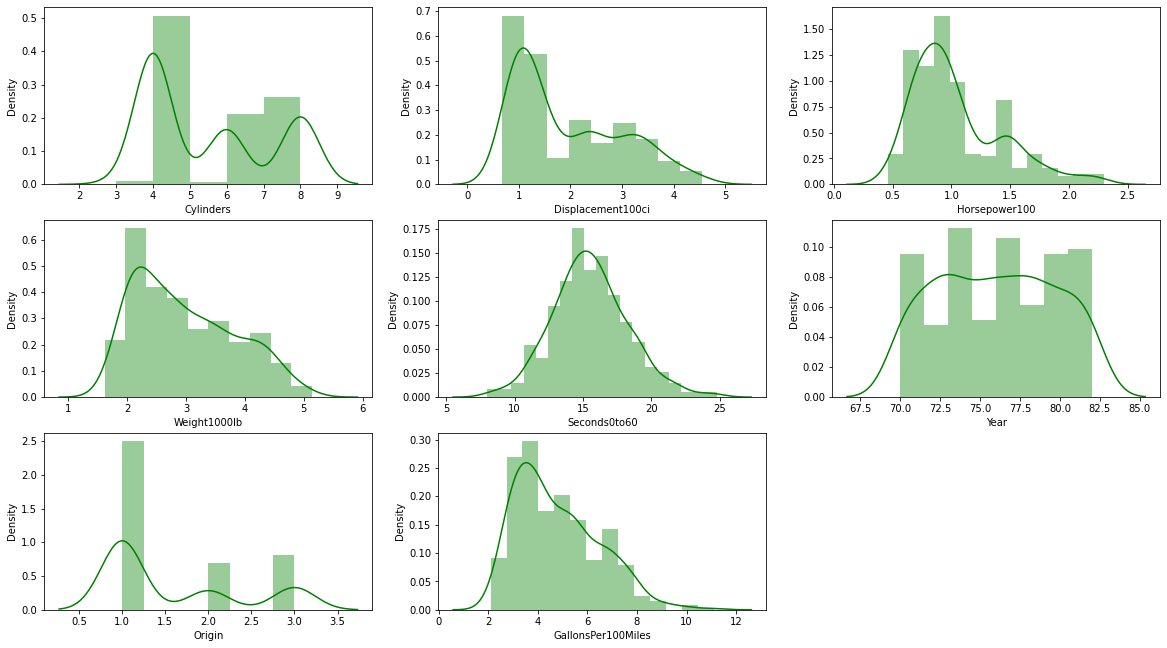

In [8]:
#Plotting distplot for the following variables : 

plt.figure(figsize= (20,15))
plt.subplot(4,3,1)
sns.distplot(data['Cylinders'], color='green')

plt.subplot(4,3,2)
sns.distplot(data['Displacement100ci'], color='green')

plt.subplot(4,3,3)
sns.distplot(data['Horsepower100'], color='green')

plt.subplot(4,3,4)
sns.distplot(data['Weight1000lb'], color='green')

plt.subplot(4,3,5)
sns.distplot(data['Seconds0to60'], color='green')

plt.subplot(4,3,6)
sns.distplot(data['Year'], color='green')

plt.subplot(4,3,7)
sns.distplot(data['Origin'], color='green')

plt.subplot(4,3,8)
sns.distplot(data['GallonsPer100Miles'], color='green')

<AxesSubplot:>

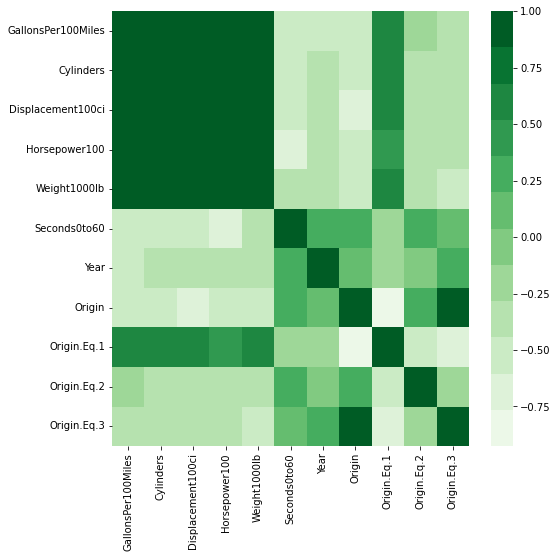

In [9]:
#To check correlation between all the variables

f, ax = plt.subplots(figsize=(8, 8))
corr = data.corr()

sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=sns.color_palette("Greens",12))

In [10]:
data.corr()

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
GallonsPer100Miles,1.000000,0.840071,0.866552,0.854039,0.885608,-0.455731,-0.556967,-0.534373,0.548117,-0.266245,-0.410182
Cylinders,0.840071,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,0.610494,-0.352324,-0.404209
Displacement100ci,0.866552,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,0.655936,-0.371633,-0.440825
Horsepower100,0.854039,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,0.489625,-0.284948,-0.321936
Weight1000lb,0.885608,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,0.600978,-0.293841,-0.447929
Seconds0to60,-0.455731,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,-0.258224,0.208298,0.115020
Year,-0.556967,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,-0.136065,-0.037745,0.199841
Origin,-0.534373,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,-0.925180,0.241148,0.888933
Origin.Eq.1,0.548117,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.925180,1.000000,-0.591434,-0.648583
Origin.Eq.2,-0.266245,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,0.241148,-0.591434,1.000000,-0.230157


In [11]:
data=data.drop('Origin',axis=1)


#### To Check Multicollinearity

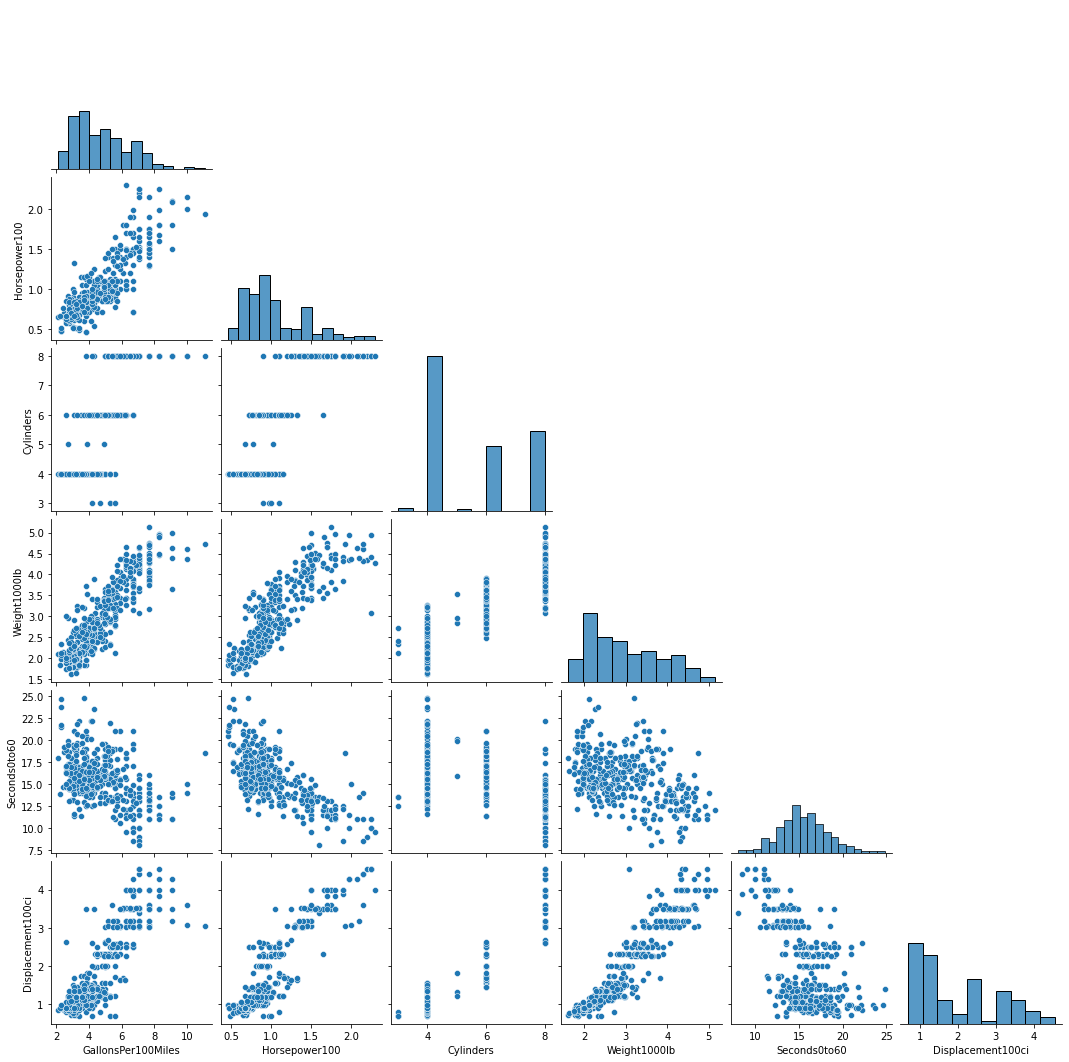

In [12]:
df=data[['GallonsPer100Miles','Horsepower100','Cylinders','Weight1000lb','Seconds0to60','Displacement100ci']]
sns.pairplot(df,corner=True)
###There exists multicollinearity between Cylinders, Horsepower and weight

In [13]:
#

### Top 10 fuel efficient cars

In [14]:
data.nsmallest(10,'GallonsPer100Miles')[['GallonsPer100Miles','Name','Cylinders','Weight1000lb']]

,GallonsPer100Miles,Name,Cylinders,Weight1000lb
320,2.1,mazda glc,4,2.110
327,2.2,honda civic 1500 gl,4,1.850
242,2.3,volkswagen rabbit custom diesel,4,1.985
323,2.3,vw rabbit c (diesel),4,2.085
324,2.3,vw dasher (diesel),4,2.335
388,2.3,vw pickup,4,2.130
307,2.4,vw rabbit,4,2.144
245,2.5,datsun b210 gx,4,2.070
322,2.5,datsun 210,4,2.110
308,2.6,toyota corolla tercel,4,1.968


In [15]:
data.Cylinders.value_counts()


4    199
8    103
6     83
3      4
5      3
Name: Cylinders, dtype: int64

In [16]:
data.groupby('Cylinders').mean()

,GallonsPer100Miles,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
Cylinders,,,,,,,,,
3,4.950000,0.725000,0.992500,2.398500,13.250000,75.500000,0.000000,0.000000,1.000000
4,3.536181,1.096709,0.782814,2.305111,16.581910,77.030151,0.346734,0.306533,0.346734
5,3.833333,1.450000,0.823333,3.103333,18.633333,79.000000,0.000000,1.000000,0.000000
6,5.171084,2.183614,1.015060,3.202120,16.254217,75.951807,0.879518,0.048193,0.072289
8,6.906796,3.450097,1.583010,4.114718,12.955340,73.902913,1.000000,0.000000,0.000000


#### Fuel consumption for cars with different weights

In [17]:
Heavy_cars=data.nlargest(10,'Weight1000lb')
Light_weight_cars=data.nsmallest(10,'Weight1000lb')
print(Heavy_cars['GallonsPer100Miles'].mean(),Light_weight_cars['GallonsPer100Miles'].mean())
#Top 10 Heavy cars take 8.42 Gallons Per 100 Miles on average
#whereas, top 10 lightest cars take 2.96 Gallons per 100 Miles on average.

8.42 2.9699999999999998


#### Analysis for different countries

In [18]:
#Dividing data into three different Origins , namely US,Europe, Japan
Us_data=data[data['Origin.Eq.1']==1]
Us_data=Us_data.drop(['Origin.Eq.2','Origin.Eq.3','Origin.Eq.1'],axis=1)
Europe_data=data[data['Origin.Eq.2']==1]
Europe_data.drop(['Origin.Eq.2','Origin.Eq.3','Origin.Eq.1'],axis=1,inplace=True)
Japan_data=data[data['Origin.Eq.3']==1]
Japan_data.drop(['Origin.Eq.2','Origin.Eq.3','Origin.Eq.1'],axis=1,inplace=True)
Us_data.groupby('Cylinders').mean()

c:\python\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,GallonsPer100Miles,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year
Cylinders,,,,,,
4,3.657971,1.240507,0.809565,2.427391,16.465217,78.043478
6,5.230137,2.266438,0.996712,3.218548,16.467123,75.657534
8,6.906796,3.450097,1.583010,4.114718,12.955340,73.902913


In [19]:
Europe_data.groupby('Cylinders').mean()

,GallonsPer100Miles,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year
Cylinders,,,,,,
4,3.713115,1.046066,0.783115,2.338295,16.727869,75.344262
5,3.833333,1.450000,0.823333,3.103333,18.633333,79.000000
6,5.375000,1.597500,1.135000,3.382500,16.425000,78.250000


In [20]:
Japan_data.groupby('Cylinders').mean()

,GallonsPer100Miles,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year
Cylinders,,,,,,
3,4.950000,0.725000,0.992500,2.398500,13.250000,75.500000
4,3.257971,0.997681,0.755797,2.153493,16.569565,77.507246
6,4.316667,1.566667,1.158333,2.882000,13.550000,78.000000


#####  Top 10 fuel efficient cars of US

In [21]:
Us_data.nsmallest(10,'GallonsPer100Miles')

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Name
340,2.6,4,0.86,0.64,1.875,16.4,81,plymouth champ
372,2.6,4,1.05,0.63,2.125,14.7,82,plymouth horizon miser
381,2.6,6,2.62,0.85,3.015,17.0,82,oldsmobile cutlass ciera (diesel)
243,2.8,4,0.98,0.66,1.800,14.4,78,ford fiesta
293,2.8,4,0.98,0.80,1.915,14.4,79,dodge colt hatchback custom
373,2.8,4,0.98,0.70,2.125,17.3,82,mercury lynx l
385,2.8,4,1.35,0.84,2.370,13.0,82,dodge charger 2.2
299,2.9,4,1.05,0.70,2.200,13.2,79,plymouth horizon
300,2.9,4,1.05,0.70,2.150,14.9,79,plymouth horizon tc3
346,2.9,4,1.05,0.63,2.215,14.9,81,plymouth horizon 4


#####  Top 10 fuel efficient cars of Europe

In [22]:
Europe_data.nsmallest(10,'GallonsPer100Miles')

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Name
242,2.3,4,0.90,0.48,1.985,21.5,78,volkswagen rabbit custom diesel
323,2.3,4,0.90,0.48,2.085,21.7,80,vw rabbit c (diesel)
324,2.3,4,0.90,0.48,2.335,23.7,80,vw dasher (diesel)
388,2.3,4,0.97,0.52,2.130,24.6,82,vw pickup
307,2.4,4,0.98,0.76,2.144,14.7,80,vw rabbit
302,2.7,4,0.91,0.69,2.130,14.7,79,fiat strada custom
325,2.7,5,1.21,0.67,2.950,19.9,80,audi 5000s (diesel)
216,2.8,4,0.79,0.58,1.825,18.6,77,renault 5 gtl
369,2.8,4,1.05,0.74,1.980,15.3,82,volkswagen rabbit l
315,2.9,4,0.97,0.78,2.188,15.8,80,audi 4000


#####  Top 10 fuel efficient cars of Japan

In [23]:
Japan_data.nsmallest(10,'GallonsPer100Miles')

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Name
320,2.1,4,0.86,0.65,2.110,17.9,80,mazda glc
327,2.2,4,0.91,0.67,1.850,13.8,80,honda civic 1500 gl
245,2.5,4,0.85,0.70,2.070,18.6,78,datsun b210 gx
322,2.5,4,0.85,0.65,2.110,19.2,80,datsun 210
308,2.6,4,0.89,0.60,1.968,18.8,80,toyota corolla tercel
339,2.6,4,0.79,0.58,1.755,16.9,81,toyota starlet
377,2.6,4,0.91,0.67,1.965,15.0,82,honda civic
379,2.6,4,0.91,0.67,1.995,16.2,82,datsun 310 gx
310,2.7,4,0.86,0.65,2.019,16.4,80,datsun 310
318,2.7,4,1.19,0.92,2.434,15.0,80,datsun 510 hatchback


#### Weight distribution in different countries of origin

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

<AxesSubplot:xlabel='Weight1000lb', ylabel='Density'>

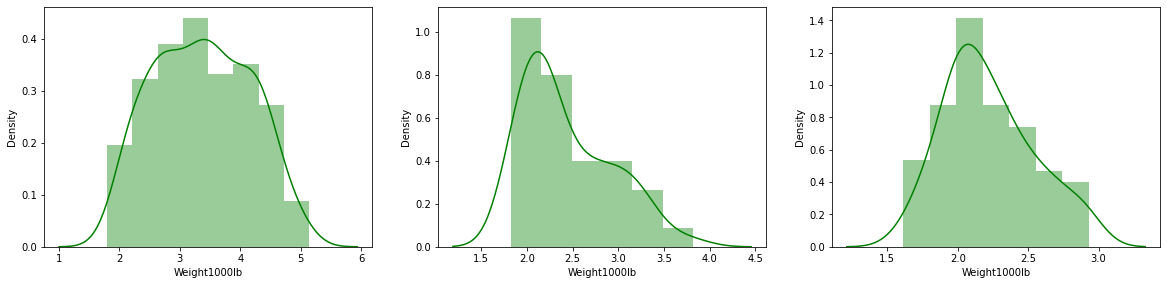

In [24]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(Us_data['Weight1000lb'], color='green')

plt.subplot(3,3,2)
sns.distplot(Europe_data['Weight1000lb'], color='green')

plt.subplot(3,3,3)
sns.distplot(Japan_data['Weight1000lb'], color='green')

#### Statistical description of cars from different origins

In [25]:
Japan_data.describe()

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,3.424051,4.101266,1.027089,0.798354,2.221228,16.172152,77.443038
std,0.757224,0.590414,0.231401,0.178192,0.320497,1.954937,3.650595
min,2.100000,3.000000,0.700000,0.520000,1.613000,11.400000,70.000000
25%,2.900000,4.000000,0.860000,0.670000,1.985000,14.600000,74.000000
50%,3.200000,4.000000,0.970000,0.750000,2.155000,16.400000,78.000000
75%,3.850000,4.000000,1.190000,0.950000,2.412500,17.550000,81.000000
max,5.600000,6.000000,1.680000,1.320000,2.930000,21.000000,82.000000


In [26]:
Us_data.describe()

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,5.492245,6.277551,2.475122,1.190490,3.372490,14.990204,75.591837
std,1.641665,1.655996,0.983763,0.398978,0.795347,2.736020,3.660368
min,2.600000,4.000000,0.850000,0.520000,1.800000,8.000000,70.000000
25%,4.200000,4.000000,1.510000,0.880000,2.720000,13.000000,73.000000
50%,5.400000,6.000000,2.500000,1.050000,3.381000,15.000000,76.000000
75%,6.700000,8.000000,3.180000,1.500000,4.055000,16.700000,78.000000
max,11.100000,8.000000,4.550000,2.300000,5.140000,22.200000,82.000000


In [27]:
Europe_data.describe()

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,3.816176,4.161765,1.096324,0.805588,2.433471,16.794118,75.676471
std,0.895029,0.506975,0.226932,0.201579,0.491814,3.087813,3.422669
min,2.300000,4.000000,0.680000,0.460000,1.825000,12.200000,70.000000
25%,3.300000,4.000000,0.947500,0.697500,2.071750,14.500000,73.000000
50%,3.800000,4.000000,1.050000,0.765000,2.240000,15.600000,76.000000
75%,4.225000,4.000000,1.210000,0.900000,2.803750,19.125000,78.250000
max,6.200000,6.000000,1.830000,1.330000,3.820000,24.800000,82.000000


In [28]:
Europe_data.Cylinders.value_counts()

4    61
6     4
5     3
Name: Cylinders, dtype: int64

In [29]:
Japan_data.Cylinders.value_counts()

4    69
6     6
3     4
Name: Cylinders, dtype: int64

In [30]:
Us_data.Cylinders.value_counts()

8    103
6     73
4     69
Name: Cylinders, dtype: int64

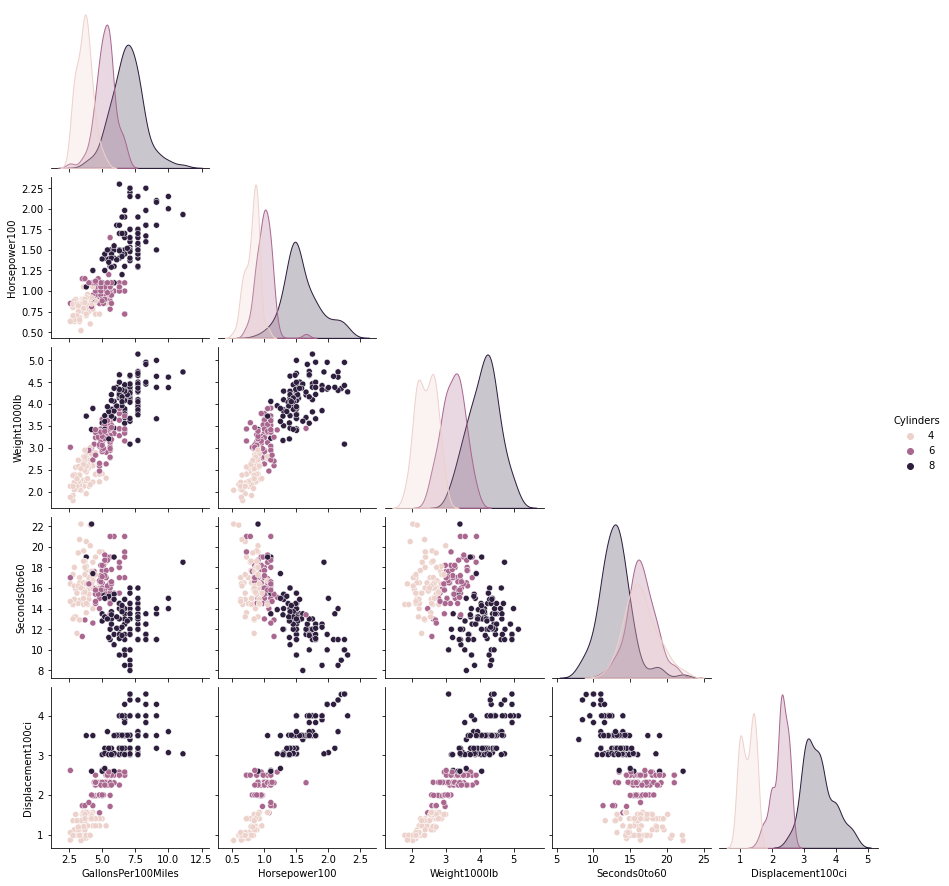

In [31]:
df=Us_data[['GallonsPer100Miles','Horsepower100','Cylinders','Weight1000lb','Seconds0to60','Displacement100ci']]
sns.pairplot(df,corner=True,hue='Cylinders')

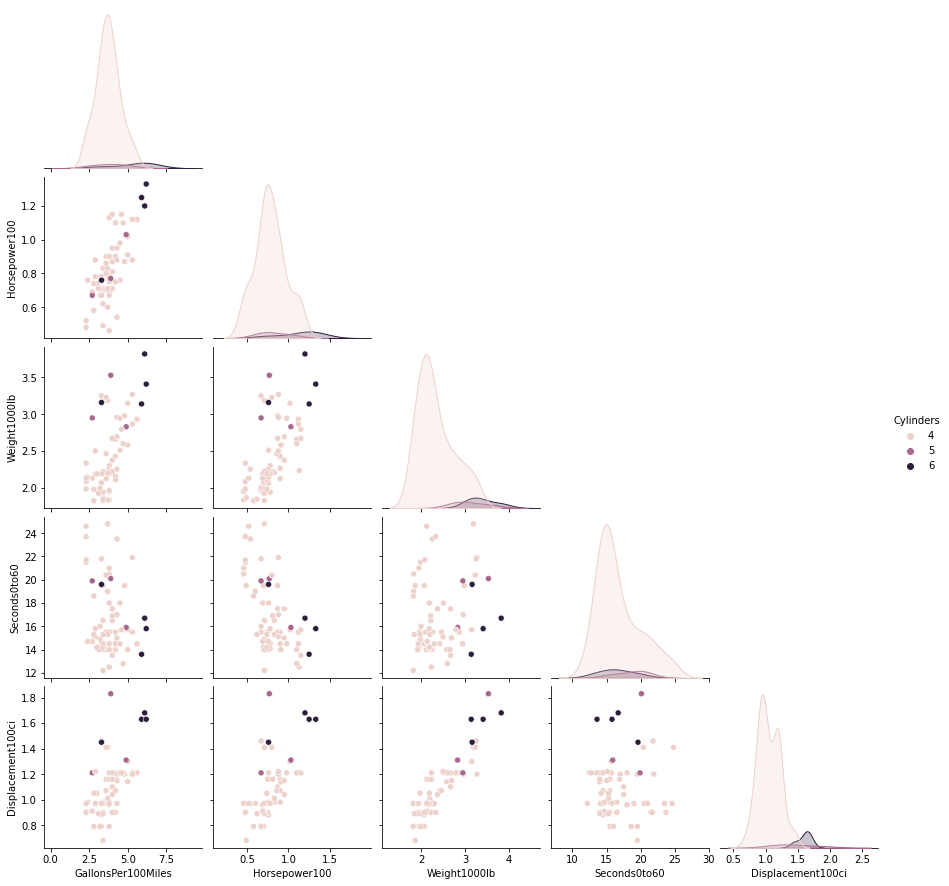

In [32]:
df=Europe_data[['GallonsPer100Miles','Horsepower100','Cylinders','Weight1000lb','Seconds0to60','Displacement100ci']]
sns.pairplot(df,corner=True,hue='Cylinders')

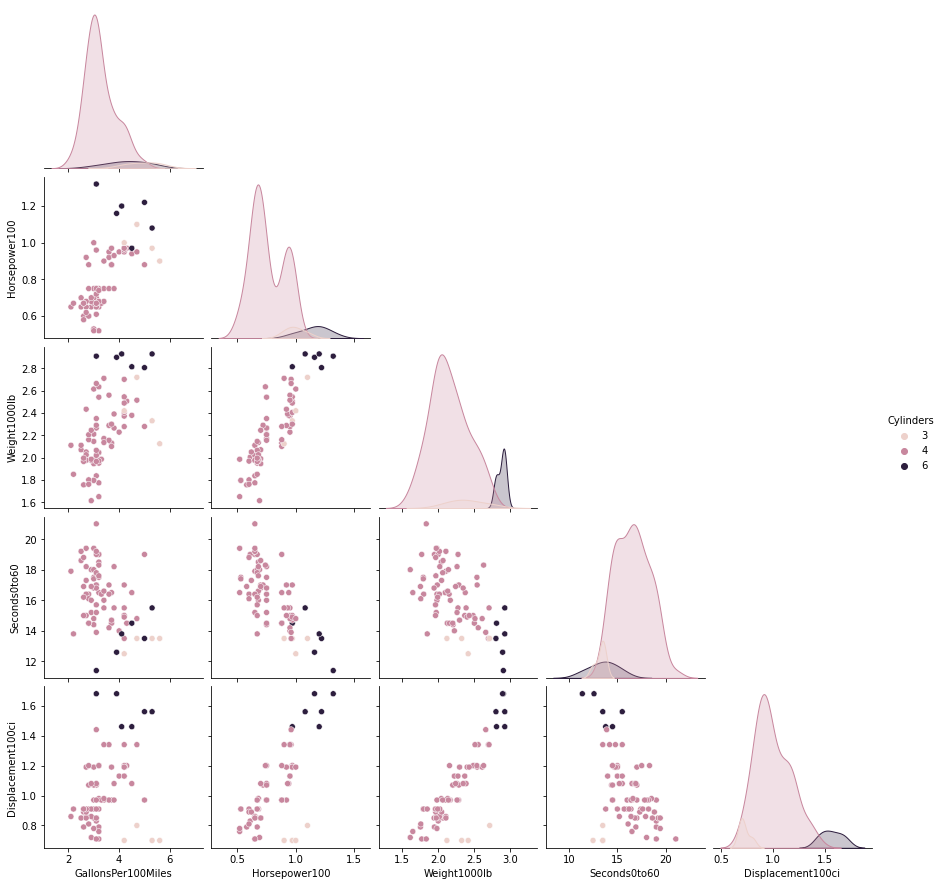

In [33]:
df=Japan_data[['GallonsPer100Miles','Horsepower100','Cylinders','Weight1000lb','Seconds0to60','Displacement100ci']]
sns.pairplot(df,corner=True,hue='Cylinders')

#### Analysis for different brands

In [34]:
data2=data
data2['Company_Name']=data2.Name.str.extract('(^.*?)\s')
data2['Company_Name'].unique()


array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', nan, 'chevroelt', 'capri', 'vw', 'mercedes-benz',
       'cadillac', 'subaru', 'mercedes', 'vokswagen', 'triumph', 'nissan'],
      dtype=object)

In [35]:
data2['Company_Name'] = data2['Company_Name'].replace(['VW','vokswagen','vw'],'volkswagen')
data2['Company_Name'] = data2['Company_Name'].replace('maxda','mazda')
data2['Company_Name'] = data2['Company_Name'].replace('toyouta','toyota')
data2['Company_Name'] = data2['Company_Name'].replace('mercedes','mercedes-benz')
data2['Company_Name'] = data2['Company_Name'].replace('nissan','datsun')
data2['Company_Name'] = data2['Company_Name'].replace('capri','ford')
data2['Company_Name'] = data2['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data2['Company_Name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', nan,
       'mercedes-benz', 'cadillac', 'subaru', 'triumph'], dtype=object)

In [36]:
data2.groupby('Company_Name').mean()[['GallonsPer100Miles','Cylinders','Weight1000lb','Displacement100ci','Horsepower100','Seconds0to60']]

,GallonsPer100Miles,Cylinders,Weight1000lb,Displacement100ci,Horsepower100,Seconds0to60
Company_Name,,,,,,
amc,5.711111,6.444444,3.289741,2.538519,1.147037,15.070370
audi,3.914286,4.285714,2.556143,1.118571,0.867143,15.942857
bmw,4.250000,4.000000,2.417000,1.210000,1.115000,12.650000
buick,5.664706,6.470588,3.553353,2.729412,1.364118,14.700000
cadillac,5.200000,8.000000,4.140000,3.500000,1.525000,14.750000
chevrolet,5.457447,6.170213,3.317383,2.394468,1.146383,15.397872
chrysler,6.133333,7.000000,3.912000,3.301667,1.536667,13.300000
datsun,3.300000,4.250000,2.238792,1.039583,0.840000,16.329167
dodge,5.100000,6.000000,3.206250,2.231250,1.171786,14.460714


In [37]:
data2.nsmallest(10,'GallonsPer100Miles')[['GallonsPer100Miles','Company_Name']]

,GallonsPer100Miles,Company_Name
320,2.1,mazda
327,2.2,honda
242,2.3,volkswagen
323,2.3,volkswagen
324,2.3,volkswagen
388,2.3,volkswagen
307,2.4,volkswagen
245,2.5,datsun
322,2.5,datsun
308,2.6,toyota


In [38]:
#Brands with US Origin
data2[data2['Origin.Eq.1']==1].Company_Name.value_counts() 

ford          49
chevrolet     47
plymouth      31
dodge         28
amc           27
buick         17
pontiac       16
mercury       11
oldsmobile    10
chrysler       6
cadillac       2
hi             1
Name: Company_Name, dtype: int64

In [39]:
#Brands with Europe Origin
data2[data2['Origin.Eq.2']==1].Company_Name.value_counts() 

volkswagen       22
peugeot           8
fiat              8
audi              7
volvo             6
saab              4
opel              4
renault           3
mercedes-benz     3
bmw               2
triumph           1
Name: Company_Name, dtype: int64

In [40]:
#Brands with Japan Origin
data2[data2['Origin.Eq.3']==1].Company_Name.value_counts() 

toyota    26
datsun    24
honda     13
mazda     12
subaru     2
Name: Company_Name, dtype: int64

#### Outlier Detection


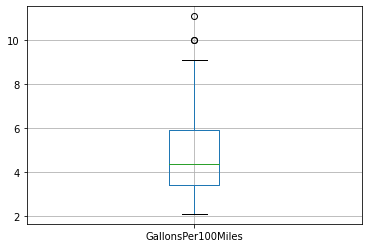

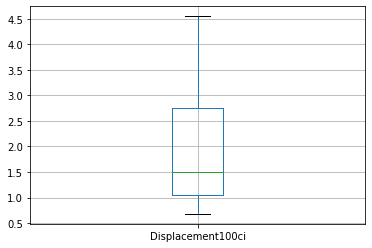

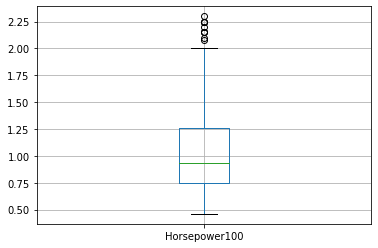

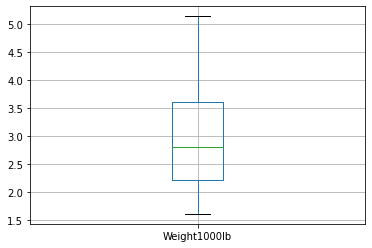

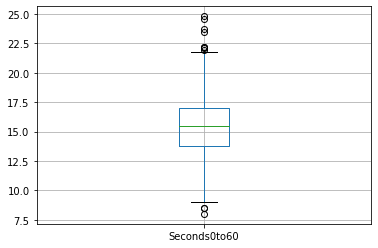

In [41]:
df=data[['GallonsPer100Miles','Displacement100ci','Horsepower100','Weight1000lb','Seconds0to60']]

for column in df:
    plt.figure()
    df.boxplot([column])

#### Outlier Capping

In [42]:
# #For Horsepower
# horsepower_desc = data.Horsepower100.describe()
# horsepower_desc
# q3_hp = horsepower_desc[6]
# q1_hp = horsepower_desc[4]
# thr=1.5
# IQR_hp = q3_hp - q1_hp
# top_limit_hp = q3_hp + thr * IQR_hp
# bottom_limit_hp = q1_hp - thr * IQR_hp

# filter_hp_bottom = bottom_limit_hp < data.Horsepower100
# filter_hp_top = data.Horsepower100 < top_limit_hp

# filter_hp = filter_hp_bottom & filter_hp_top
# data= data[filter_hp]

# #For Seconds0to60:
# seconds_desc = data.Seconds0to60.describe()
# q3_sec = seconds_desc[6]
# q1_sec =seconds_desc[4]
# thr=1.5
# IQR= q3_sec - q1_sec
# top_limit = q3_sec + thr * IQR
# bottom_limit= q1_sec - thr * IQR

# filter_bottom = bottom_limit < data.Seconds0to60
# filter_top = data.Seconds0to60< top_limit

# filter= filter_bottom & filter_top
# data= data[filter]

# #For GallonsPerMiles:
# gpm_desc = data.GallonsPer100Miles.describe()
# q3_gpm = gpm_desc[6]
# q1_gpm = gpm_desc[4]
# thr=1.5
# IQR_gpm = q3_gpm - q1_gpm
# top_limit_gpm = q3_gpm + thr * IQR_gpm
# bottom_limit_gpm = q1_gpm - thr * IQR_gpm

# filter_gpm_bottom = bottom_limit_gpm < data.GallonsPer100Miles
# filter_gpm_top = data.GallonsPer100Miles < top_limit_gpm

# filter_gpm = filter_gpm_bottom & filter_gpm_top
# data= data[filter_gpm]

#### Probability Plot for Target Variable

You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


((array([-2.90819119, -2.61881541, -2.45552523, -2.33944901, -2.24830847,
         -2.17272731, -2.10783613, -2.0507686 , -1.99968947, -1.95335009,
         -1.910861  , -1.87156532, -1.83496359, -1.80066685, -1.76836607,
         -1.73781144, -1.70879805, -1.68115566, -1.65474121, -1.6294333 ,
         -1.60512798, -1.58173551, -1.55917789, -1.53738686, -1.51630233,
         -1.49587113, -1.47604593, -1.45678448, -1.43804883, -1.41980479,
         -1.40202145, -1.38467077, -1.36772721, -1.35116745, -1.33497014,
         -1.31911569, -1.30358605, -1.28836459, -1.27343592, -1.25878578,
         -1.24440094, -1.23026908, -1.21637874, -1.20271921, -1.18928047,
         -1.17605315, -1.16302846, -1.15019813, -1.1375544 , -1.12508996,
         -1.1127979 , -1.10067173, -1.08870527, -1.07689272, -1.06522856,
         -1.05370754, -1.04232472, -1.03107538, -1.01995502, -1.00895938,
         -0.9980844 , -0.9873262 , -0.97668106, -0.96614547, -0.95571605,
         -0.94538956, -0.93516291, -0.

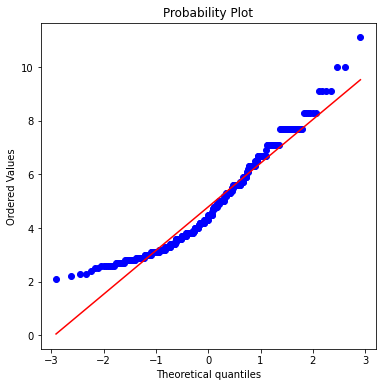

In [43]:
!pip install scipy
from scipy import stats
plt.figure(figsize = (6, 6))
stats.probplot(data.GallonsPer100Miles, plot = plt)

In [44]:
# data.GallonsPer100Miles=np.log1p(data.GallonsPer100Miles)
# data.Seconds0to60=np.log1p(data.Seconds0to60)

### Modelling

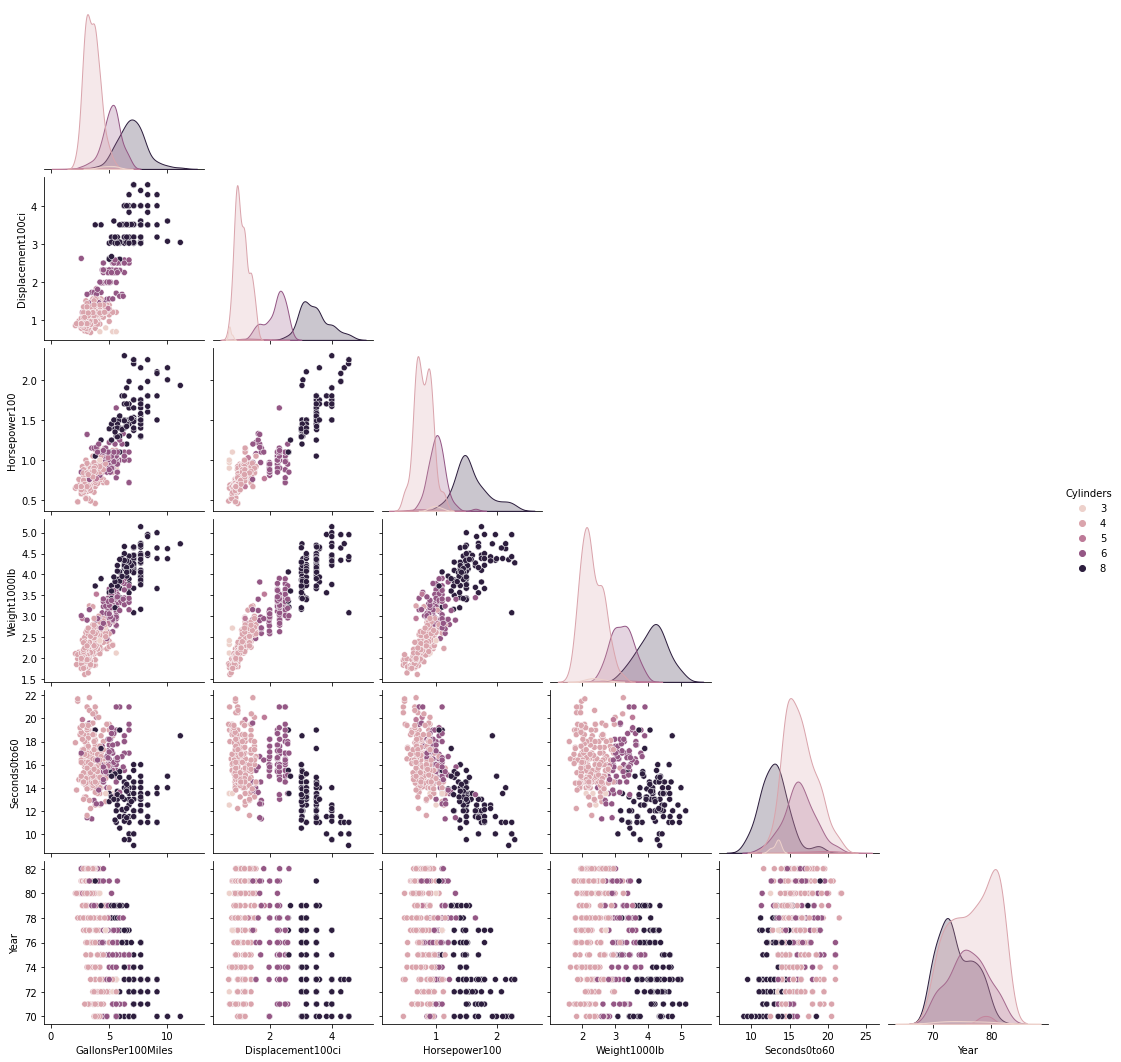

In [45]:
data_pair=data.drop(['Name','Origin.Eq.1','Origin.Eq.2','Origin.Eq.3'],axis=1)
sns.pairplot(data_pair,corner=True,hue='Cylinders')

#### Splitting into test and train

In [46]:
# train=data[data['Year']!=82]
# test=data[data['Year']==82]
# y_test=test[['GallonsPer100Miles']]
# y_train=train[['GallonsPer100Miles']]
# X_test=test.drop(['GallonsPer100Miles','Year'],axis=1)
# X_train=train.drop(['GallonsPer100Miles','Year'],axis=1)

# print(y_test.shape,X_test.shape,y_train.shape,X_train.shape)

In [47]:
data=pd.get_dummies(data, columns=['Cylinders'],drop_first=True)
data.head()

,GallonsPer100Miles,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name,Company_Name,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
0,5.6,3.07,1.30,3.504,12.0,70,1,0,0,chevrolet chevelle malibu,chevrolet,0,0,0,1
1,6.7,3.50,1.65,3.693,11.5,70,1,0,0,buick skylark 320,buick,0,0,0,1
2,5.6,3.18,1.50,3.436,11.0,70,1,0,0,plymouth satellite,plymouth,0,0,0,1
3,6.3,3.04,1.50,3.433,12.0,70,1,0,0,amc rebel sst,amc,0,0,0,1
4,5.9,3.02,1.40,3.449,10.5,70,1,0,0,ford torino,ford,0,0,0,1


In [48]:
from sklearn.model_selection import train_test_split
y=data[['GallonsPer100Miles']]
x=data.drop(['GallonsPer100Miles','Year','Name','Company_Name','Origin.Eq.1'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(x, y,random_state = 2,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(266, 10) (115, 10) (266, 1) (115, 1)


In [49]:
# x =  pd.DataFrame(scaler.fit_transform(X_train),columns=['Cylinders','Displacement','Hp','Weight','Acceleration'])
# y  = pd.DataFrame(scaler.fit_transform(y_train),columns=['GallonsPer100Miles'])
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# y_train=scaler.fit_transform(y_train)
# y_test=scaler.transform(y_test)

In [50]:
X_train

,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Origin.Eq.2,Origin.Eq.3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
339,0.79,0.58,1.755,16.9,0,1,1,0,0,0
93,4.40,2.15,4.735,11.0,0,0,0,0,0,1
151,2.50,1.05,3.459,16.0,0,0,0,0,1,0
355,1.45,0.76,3.160,19.6,1,0,0,0,1,0
264,0.98,0.68,2.155,16.5,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
308,0.89,0.60,1.968,18.8,0,1,1,0,0,0
25,3.60,2.15,4.615,14.0,0,0,0,0,0,1
76,1.21,0.76,2.511,18.0,1,0,1,0,0,0
18,0.97,0.88,2.130,14.5,0,1,1,0,0,0


#### Fitting the Multiple Linear Regression model

In [51]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)
y_pred=linReg.predict(X_test)
R_sq=linReg.score(X_test,y_test)
print('R_square=',R_sq.round(3))
mse = mean_squared_error(y_test, y_pred)
print('MSE :',mse)
n=392
k=11
adj_Rsq= (1-((1-R_sq)*(n-1)/(n-k-1)))
print('Adjusted_R_square=',adj_Rsq.round(4))


R_square= 0.815
MSE : 0.5175517241982056
Adjusted_R_square= 0.8099


In [52]:
y_pred_train=linReg.predict(X_train)
R_sq_train=linReg.score(X_train,y_train)
print('R_square=',R_sq.round(3))
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE :',mse)
n=392
k=11
adj_Rsq= (1-((1-R_sq)*(n-1)/(n-k-1)))
print('Adjusted_R_square=',adj_Rsq.round(4))

R_square= 0.815
MSE : 0.5175517241982056
Adjusted_R_square= 0.8099


c:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GallonsPer100Miles'>

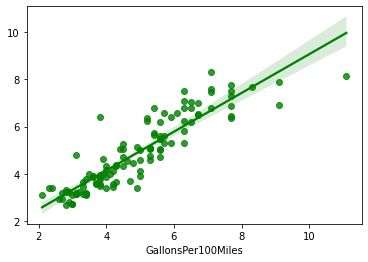

In [53]:
sns.regplot(y_test,y_pred, color='g')

## Outputs


In [54]:
print('Intercept=',linReg.intercept_)
print('coefficients are :',linReg.coef_)

Intercept= [0.72116153]
coefficients are : [[ 0.3473902   1.60259441  0.53997213  0.08183462  0.2204651  -0.13011716
  -1.43554207 -2.46232596 -1.01206685 -0.78827838]]


c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

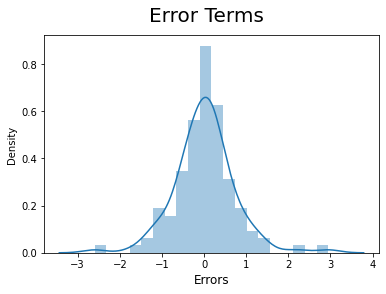

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 12) 
#The residuals of the model are normally distributed.

In [56]:
#Durbin watson test statistic is 2.075 , Hence there is no autocorrelation

In [57]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(X_train)
result = sm.OLS(y_train, x_train_lm).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     GallonsPer100Miles   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     135.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           5.31e-96
Time:                        01:02:12   Log-Likelihood:                -267.32
No. Observations:                 266   AIC:                             556.6
Df Residuals:                     255   BIC:                             596.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7212      0.63